## Does weather effect transmission?

There have been some investigations on the effect of temperature and humidity on the transmission of SARS-Cov-2, but most were based on limited datasets when the vast majority of data was concentrated in China and had limited variability in temperature. They suggested a small change in transmission dymanics  

For example,
https://www.medrxiv.org/content/10.1101/2020.02.12.20022467v1
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3551767
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3550308

I'd like to investigate these with a larger data set and updated data

So far I've only pulled together the data from JHU with weather data from the WWO, but since I've built the tools to keep these updated, I'd like to share this kernel in case others would like to work on a the same data set.

I used this package to pull historical weather:https://github.com/ekapope/WorldWeatherOnline.
I fixed a bug and added caching, so you can use my fork until that is merged. I don't think the bug will effect the data unless you run on the last day of the month. The caching is very useful for limitting calls though

My fork is at https://github.com/zack-kimble/WorldWeatherOnline
I install it below directly 

In [ ]:
!pip install -e git+https://github.com/zack-kimble/WorldWeatherOnline.git#egg=wwo_hist

In [ ]:
I am mainly working out of github, so the primary functions are here: https://github.com/zack-kimble/covid/tree/master

In [ ]:
!pip install -e git+https://github.com/zack-kimble/covid.git#egg=covid

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np

from retrieve_data import retrieve_data

#this pulls newest JHU data for cases, deaths, and recoveries, pivots and joins them and does some filling of missing values.
#then pulls data for each lat/lon/date from world weather online historical API
retrieve_data()



Retrieving weather data for -40.9006,174.886


Currently retrieving data for -40.9006,174.886: from 2020-01-22 to 2020-01-31
network issue, saving retrieved and exiting
unable to retrieve any new weather data


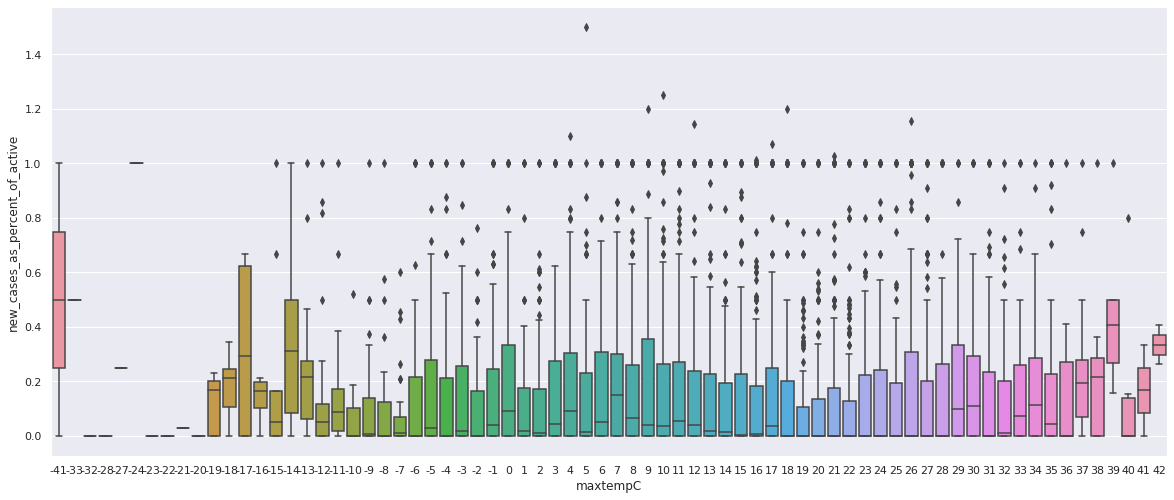

In [27]:
sns.set(rc={'figure.figsize': (20, 8.27)})
epidemiology_and_weather_df = pd.read_csv('data/prepped_data.csv')
box_df = epidemiology_and_weather_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['new_cases_as_percent_of_active'],how="all")
box_df = box_df[box_df['cases']>0]

sns.boxplot(data=box_df, x='maxtempC', y='new_cases_as_percent_of_active')


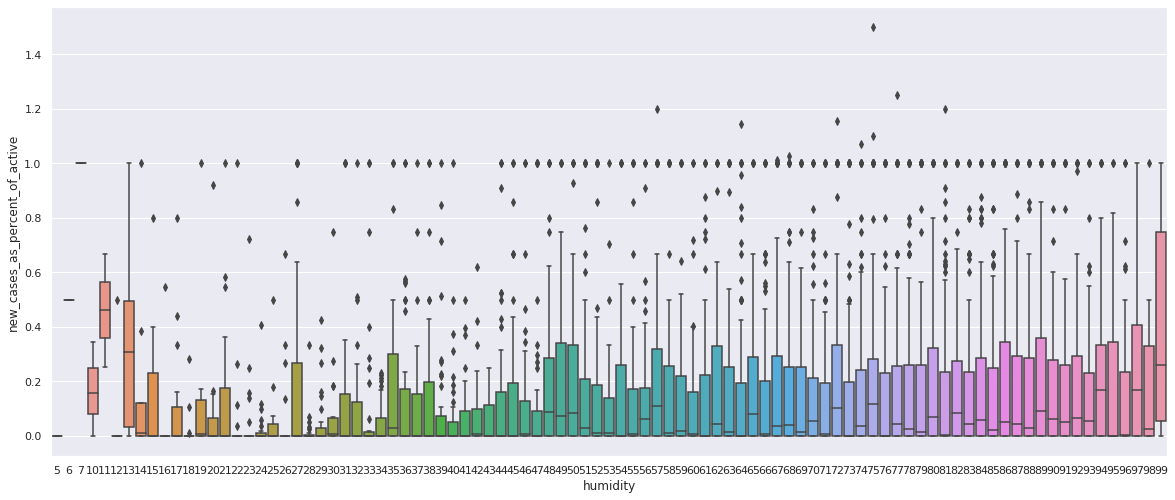

In [29]:
sns.boxplot(data=box_df, x='humidity', y='new_cases_as_percent_of_active')